In [91]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [92]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [93]:
#   بخش تارگت همون لیبله در اصل که اگر فرد سالم باشد لیبل صفر و اگر بیمار باشد، لیبل یک خواهد بود
bc.target[500]

np.int64(1)

In [94]:
bc.target.shape

(569,)

In [95]:
# برای دیدن اون سی تا فیچر از دیتا استفاده میکنیم
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [96]:
bc.data.shape

(569, 30)

# Preprocessing

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)


In [98]:
# میخواهیم سایز ترین و تستمون رو ببینیم
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


# Normalizing Data

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [100]:
x_train[0]

array([0.12970754, 0.26846473, 0.13383221, 0.06599159, 0.58075377,
       0.28133243, 0.15759138, 0.19706759, 0.29395754, 0.48083404,
       0.10519401, 0.24549151, 0.04694573, 0.02965644, 0.29836489,
       0.30340674, 0.10111111, 0.29247964, 0.27168346, 0.23151334,
       0.09509539, 0.22894456, 0.08662498, 0.04138547, 0.45585419,
       0.20249149, 0.15159744, 0.33565277, 0.20559827, 0.27535091])

In [101]:
x_test[10]

array([0.50631051, 0.45767635, 0.49992805, 0.34038445, 0.6394048 ,
       0.45126066, 0.4346298 , 0.52385686, 0.41807295, 0.24641955,
       0.2873332 , 0.22980021, 0.26731124, 0.16269766, 0.24897168,
       0.35515366, 0.13146465, 0.34874029, 0.13927506, 0.14072109,
       0.43096265, 0.3488806 , 0.39860709, 0.26756649, 0.46642013,
       0.31290082, 0.28618211, 0.52187392, 0.17701557, 0.14653024])

# Classification

In [102]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    accu_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    accu_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train: {accu_train}- acc test: {accu_test} - percision: {p} - recall: {r}")
    return accu_train, accu_test, r, p

##  1. Naive bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [104]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

accu_train_gnb, accu_test_gnb, r_gnb, p_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.945054945054945- acc test: 0.9210526315789473 - percision: 0.9054054054054054 - recall: 0.9710144927536232


## 2. KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [106]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

accu_train_knn, accu_test_knn, r_knn, p_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.978021978021978- acc test: 0.9736842105263158 - percision: 0.9583333333333334 - recall: 1.0


## 3. Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [108]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

accu_train_dt, accu_test_dt, r_dt, p_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0- acc test: 0.8947368421052632 - percision: 0.9384615384615385 - recall: 0.8840579710144928


## 4. Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [110]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accu_train_rf, accu_test_rf, r_rf, p_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9956043956043956- acc test: 0.9298245614035088 - percision: 0.9420289855072463 - recall: 0.9420289855072463


## 5. SVM

In [111]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [112]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

accu_train_svm, accu_test_svm, r_svm, p_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9868131868131869- acc test: 0.9824561403508771 - percision: 0.971830985915493 - recall: 1.0


## 6. Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [114]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

accu_train_lr, accu_test_lr, r_lr, p_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9692307692307692- acc test: 0.9649122807017544 - percision: 0.9452054794520548 - recall: 1.0


## 7. ANN

In [115]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam')
ann.fit(x_train, y_train)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [116]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

accu_train_ann, accu_test_ann, r_ann, p_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.989010989010989- acc test: 0.9736842105263158 - percision: 0.9714285714285714 - recall: 0.9855072463768116


# Comparison

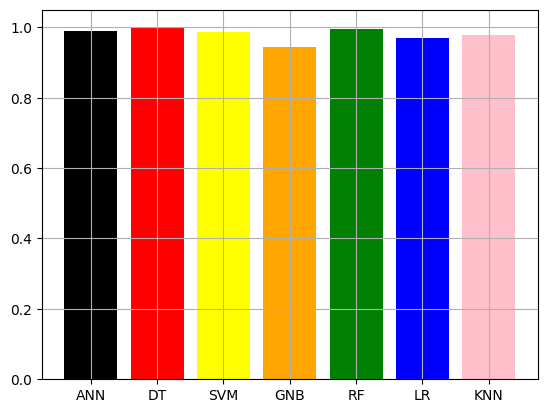

In [117]:
import matplotlib.pyplot as plt

acc_train = [accu_train_ann, accu_train_dt, accu_train_svm, accu_train_gnb, accu_train_rf,accu_train_lr, accu_train_knn]
title = ["ANN", "DT", "SVM", "GNB", "RF", "LR", "KNN"]

colors = ['black', 'red', 'yellow','orange', 'green', 'blue', 'pink']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

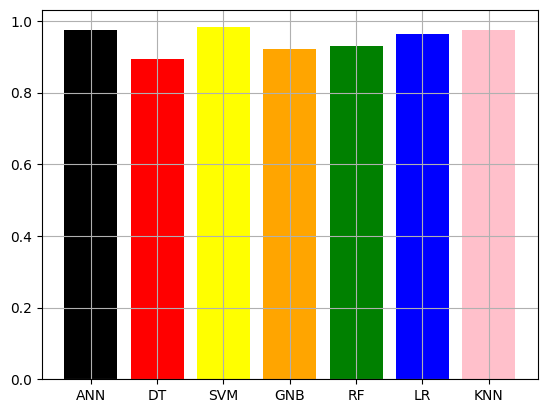

In [118]:
acc_test = [accu_test_ann, accu_test_dt, accu_test_svm, accu_test_gnb, accu_test_rf,accu_test_lr, accu_test_knn]
title = ["ANN", "DT", "SVM", "GNB", "RF", "LR", "KNN"]

colors = ['black', 'red', 'yellow','orange', 'green', 'blue', 'pink']
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

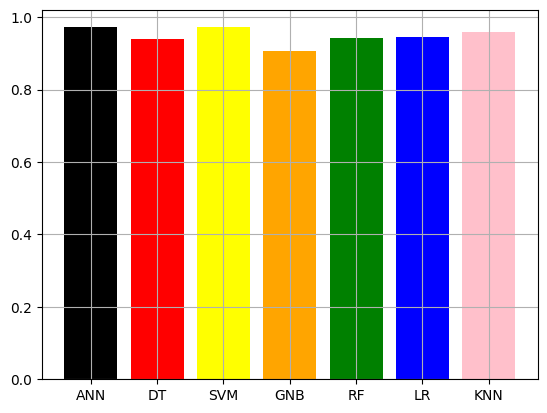

In [119]:
p = [p_ann, p_dt, p_svm, p_gnb, p_rf, p_lr, p_knn]
title = ["ANN", "DT", "SVM", "GNB", "RF", "LR", "KNN"]

colors = ['black', 'red', 'yellow','orange', 'green', 'blue', 'pink']
plt.bar(title, p, color = colors)
plt.grid()
plt.show()

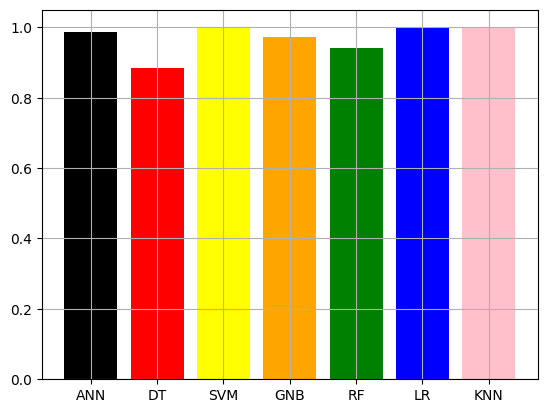

In [121]:
r = [r_ann, r_dt, r_svm, r_gnb, r_rf, r_lr, r_knn]
title = ["ANN", "DT", "SVM", "GNB", "RF", "LR", "KNN"]

colors = ['black', 'red', 'yellow','orange', 'green', 'blue', 'pink']
plt.bar(title, r, color = colors)
plt.grid()
plt.show()